# CREDIT SCORE PREDICTION NOTEBOOK

## BUSINESS UNDERSTANDING

    In this project, the primary objective is to develop a robust and accurate model that evaluates an individual's creditworthiness. The project involves leveraging machine learning algorithms and statistical analyses to assess a variety of relevant factors, such as financial history, payment behavior, outstanding debts, and other relevant variables. By understanding the intricate relationships between these factors, the predictive model aims to generate a numerical credit score that serves as a reliable indicator of an individual's likelihood to meet their financial obligations. The business value lies in providing financial institutions with an efficient and objective tool for risk assessment, aiding in more informed decision-making during the lending process. This predictive model not only enhances the efficiency of credit evaluations but also contributes to minimizing default risks and optimizing the allocation of resources within the lending ecosystem.







## DATA UNDERSTANDING

The data used in this project was extracted from kaggle.


In [65]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer


In [66]:
df = pd.read_csv('loan.csv')

### Data Preprocessing

The purpose of data preprocessing is to:
- Check missing values

- Duplicates

- display total number of rows

In [67]:
# In this cell we will create data preprocessing function

class DataInfo():

    """Class for processing and giving the general information of the data"""
    # initialize the class
    def __init__(self, data):
        self.data = data

    # calculate percentage of missing values
    def calculate_missing_percentage(self):
        missing_values_perce = (self.data.isnull().sum()/len(self.data))*100
        return missing_values_perce

    # Calculate percentage of duplicates
    def calculate_duplicates_percentage(self):
        duplicated_perce = (self.data.duplicated().sum()/len(self.data))*100
        return duplicated_perce

    # To displaying shape
    def display_shape(self):
        shape = self.data.shape
        return shape

    # Displaying info
    def display_info(self):
        print(self.data.info())

    # Display the description
    def display_describe(self):
        describe = self.data.describe()
        return describe

In [68]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [69]:
#instantiate analyzer from data information class

analyzer = DataInfo(df)

In [70]:
# Get the name of all the columns in the dataset

columns = df.columns

columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [71]:
# Find the information of the dataset

info = analyzer.display_info()

print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
None


In [72]:
# Find th shape of the data set ie number of rows and columns

shape = analyzer.display_shape()

shape

(614, 13)

In [73]:
# Finding missing values in the dataset and their percentage

missing = analyzer.calculate_missing_percentage()

missing

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [74]:
#Finding the duplicates in the dataset

duplicates = analyzer.calculate_duplicates_percentage()

duplicates

0.0

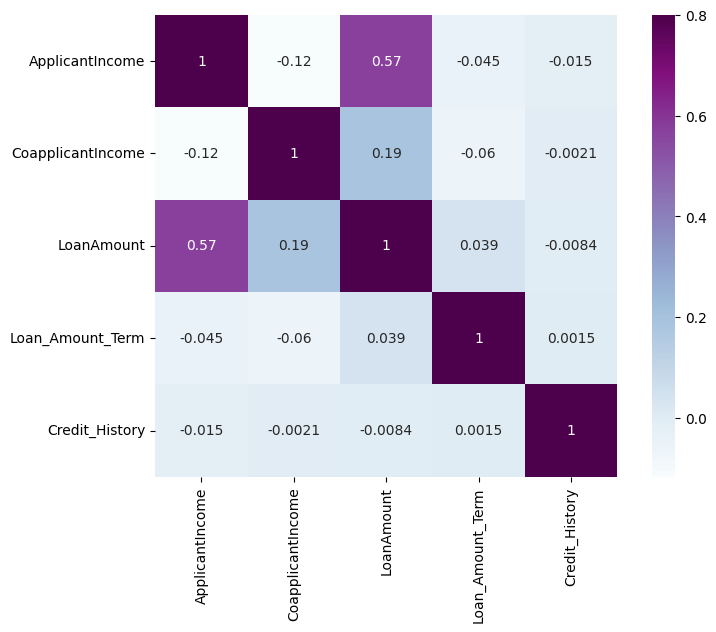

In [75]:
# Finding the correlation betweem the variables

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Finding the correlation between the variables
matrix = numeric_df.corr()

# Plot the heatmap
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, cmap="BuPu", square=True, annot=True);


In [76]:
#use simple imputer to fill missing values and mean strategy

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
loan_n = df.iloc[:, 8:11]
dependat =df['Dependents']
dependat = dependat.replace('3+', 3)
loan_n1 = df.iloc[:, 3:4]
imputer.fit(loan_n)
loan_n = imputer.transform(loan_n)
loan_d = pd.DataFrame(loan_n)

In [77]:
#Assign the column names to the dataframe
df['LoanAmount'],df['Loan_Amount_Term'], df['Credit_History'] = loan_d[0], loan_d[1], loan_d[2]

In [78]:
# Impute other null variables
employ = df['Self_Employed']
P_area = df['Property_Area']
gender = df["Gender"]
status = df["Married"]
education = df["Education"]
loan_status = df['Loan_Status']

status = status.fillna("Yes")
gender = gender.fillna("Male")
P_area= P_area.fillna("Rural")
employ= employ.fillna("Yes")
dependat = dependat.fillna(1)

In [79]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [80]:
# Initialize string variables to be Encoded

input_class = ["Male", "Female"]
input_class1 = ["Yes", "No"]
input_class2 = ["Rural", "Urban", "Semiurban"]
input_class3 = ["Graduate", "Not Graduate"]
input_class4 = ["Y", "N"]

label_encoder.fit(input_class)

gender = gender.iloc[:].values
gender = list(gender)
gender = label_encoder.transform(gender)

label_encoder.fit(input_class1)

status = status.iloc[:].values
employ = employ.iloc[:].values
employ = list(employ)
status = list(status)
status = label_encoder.transform(status)
employ = label_encoder.transform(employ)

label_encoder.fit(input_class2)
P_area = P_area.iloc[:].values
P_area = list(P_area)
P_area = label_encoder.transform(P_area)

label_encoder.fit(input_class3)

education = education.iloc[:].values
education = list(education)
education = label_encoder.transform(education)

label_encoder.fit(input_class4)

loan_status = loan_status.iloc[:].values
loan_status =list(loan_status)
loan_status = label_encoder.transform(loan_status)


In [81]:
# Create a new dataframe with the encoded variables
df['Education'],df['Self_Employed'],df['Property_Area'],df["Gender"],df["Married"], df['Loan_Status'], df['Dependents'] =education, employ, P_area, gender, status, loan_status, dependat

In [82]:
# Write the encoded dataframe to a csv file
df.head()
df.to_csv("Loan_Processed_data.csv")

In [83]:
# Create a data and target for the model
data = df.iloc[:, 1:-1]
target = df.iloc[:, -1:]

In [84]:
# check at the dataframe data
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


<Axes: xlabel='LoanAmount'>

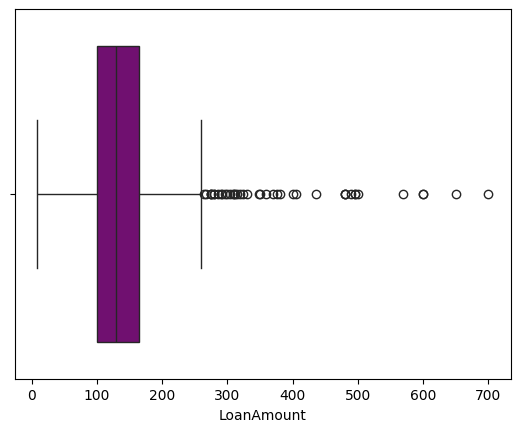

In [85]:
#Find outliers in the dataset

from turtle import title
sns.boxplot(x=df['LoanAmount'], color="purple")

* Observing the dataset, it becomes evident that there are outliers among lon applicants seeking amounts within the 600K to 700K range. The majority of data is concentrated on the left, while the right side is less dense, indicating a right-skewed distribution. To address this skewness, applying a log transformation could be a suitable corrective measure.

# MODELING

## Preparing Data for Modelling

### Splitting the Data

In [86]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size= 0.2, random_state=10)

In [87]:
# print the shape of the training and testing data
print(x_train.shape)
print(x_test.shape)


(491, 11)
(123, 11)


In [88]:
#print the size of the training and testing data
print("The size of the training datset is: ", x_train.size)
print("The size of the testing dataset is: ", x_test.size)

The size of the training datset is:  5401
The size of the testing dataset is:  1353


## DATA ANALYSIS 

### Univariate analysis

In [89]:
df2 = pd.read_csv('Loan_Processed_data.csv')
df2.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [90]:
# Check the number of approved  and unapproved loans
df2['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [91]:
# Normalize the data to print proportions instead of number
df2['Loan_Status'].value_counts(normalize=True)

Loan_Status
1    0.687296
0    0.312704
Name: proportion, dtype: float64

<Axes: title={'center': 'Loan Status count'}, xlabel='Loan_Status'>

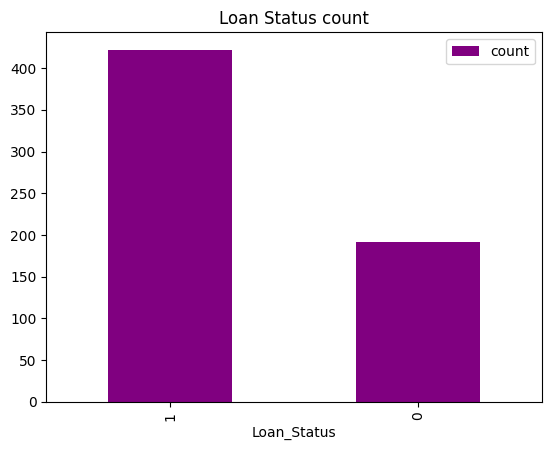

In [92]:
# Visualize the count of approved and unapproved loans with legend
df2['Loan_Status'].value_counts().plot.bar(title='Loan Status count', legend=True, color = 'purple')

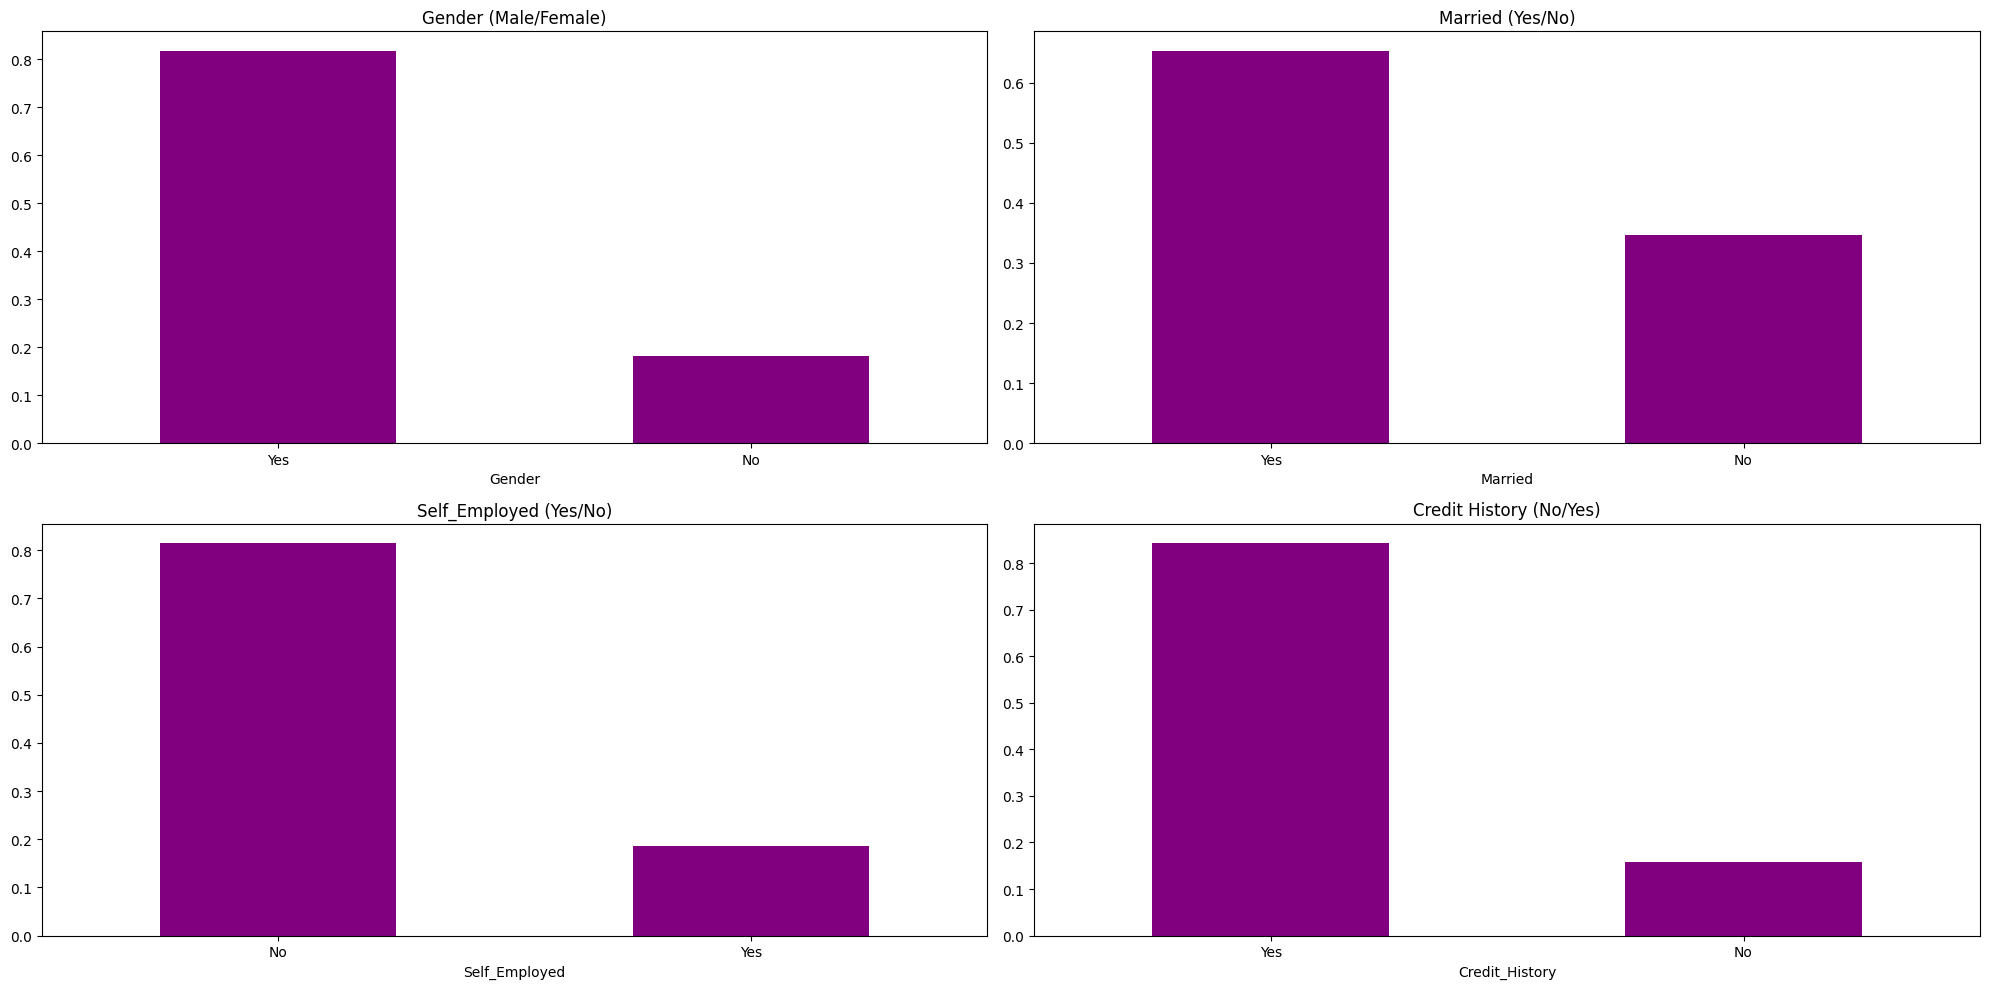

In [94]:
# Visualize the count for Gender, Married, Self_Employed, Credit_History, Property_Area, Education (Categorical Variables)


# Mapping 1 to 'Yes' and 0 to 'No' for relevant columns
df2['Gender'] = df2['Gender'].map({1: 'Yes', 0: 'No'})
df2['Married'] = df2['Married'].map({1: 'Yes', 0: 'No'})
df2['Self_Employed'] = df2['Self_Employed'].map({1: 'Yes', 0: 'No'})
df2['Credit_History'] = df2['Credit_History'].map({1: 'Yes', 0: 'No'})

plt.figure(1, figsize=(20, 10))

plt.subplot(221)
df2['Gender'].value_counts(normalize=True).plot.bar(title='Gender (Male/Female)', color='purple')
plt.xticks(rotation=0)  # Keeping x-axis labels upright

plt.subplot(222)
df2['Married'].value_counts(normalize=True).plot.bar(title='Married (Yes/No)', color='purple')
plt.xticks(rotation=0)  # Keeping x-axis labels upright

plt.subplot(223)
df2['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed (Yes/No)', color='purple')
plt.xticks(rotation=0)  # Keeping x-axis labels upright

plt.subplot(224)
df2['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History (No/Yes)', color='purple')
plt.xticks(rotation=0)  # Keeping x-axis labels upright

plt.tight_layout()
plt.show()
